# Trabajo Semanal 10

In [7]:
from IPython.display import IFrame
IFrame("./TS10.pdf", width=1000, height=1000)

## Verificación Punto 1 - Foster Paralelo

Circuito simulado con valores calculados:
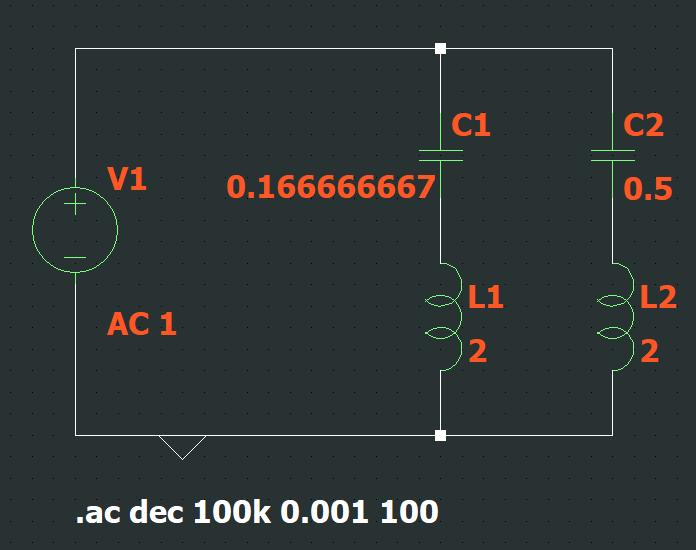

Comparado con expresión de impedancia que se plantea en el enunciado:

## $Z_{(S)}=\frac{(S^2+3) (S^2+1) } { S(S^2+2) }$

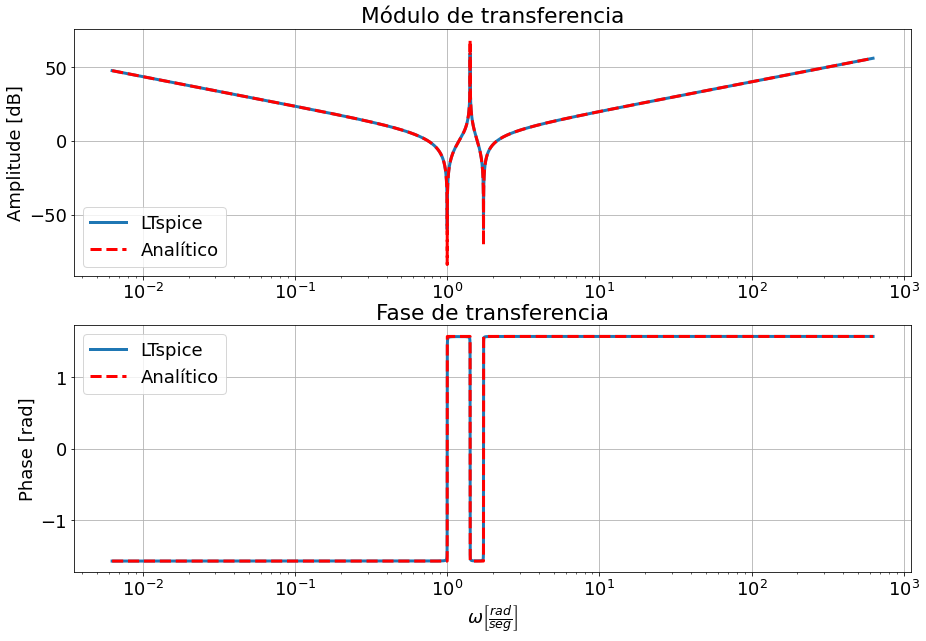

In [4]:
import scipy.signal as sig
import ltspice
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({'font.size': 18})

l = ltspice.Ltspice("./Simulaciones_LTspice/1-Foster.raw")
l.parse()

fig, axes = plt.subplots(2, 1, figsize=(15,10))

#Obtengo curvas de simulación en ltspice

freq = l.get_frequency()
Z = 1/l.get_data('I(V1)') #1V/I_V1 = Z (V1 = 1V)

Z_amplitude = 20 * np.log10(np.abs(Z))
Z_angle = np.unwrap(np.angle(Z))-np.pi

#Comparo con la función de excitación de la consigna
num = [1,0,4,0,3]
den = [1,0,2,0]
w, F = sig.freqs(num,den,freq*2*np.pi)
    
axes[0].semilogx(freq*2*np.pi, Z_amplitude, linewidth=3.0, label='LTspice')
axes[0].semilogx(w, 20*np.log10(np.abs(F)), 'r--', linewidth=3.0, label='Analítico')

axes[1].semilogx(freq*2*np.pi, Z_angle, linewidth=3.0, label='LTspice')
axes[1].semilogx(w, np.angle(F), 'r--', linewidth=3.0, label='Analítico')

axes[0].grid()
axes[1].grid()

axes[0].set_title("Módulo de transferencia")
axes[1].set_title("Fase de transferencia")

axes[1].set_xlabel(r'$\omega \left[\frac{rad}{seg}\right]$')

axes[0].set_ylabel("Amplitude [dB]")
axes[1].set_ylabel("Phase [rad]")

#plt.savefig("ac.png")

axes[0].legend()
axes[1].legend()

plt.show()

## Verificación Punto 1 - Cauer 1 y 2

Circuitos simulados con valores calculados:

Cauer - Removiendo $K_\infty S$
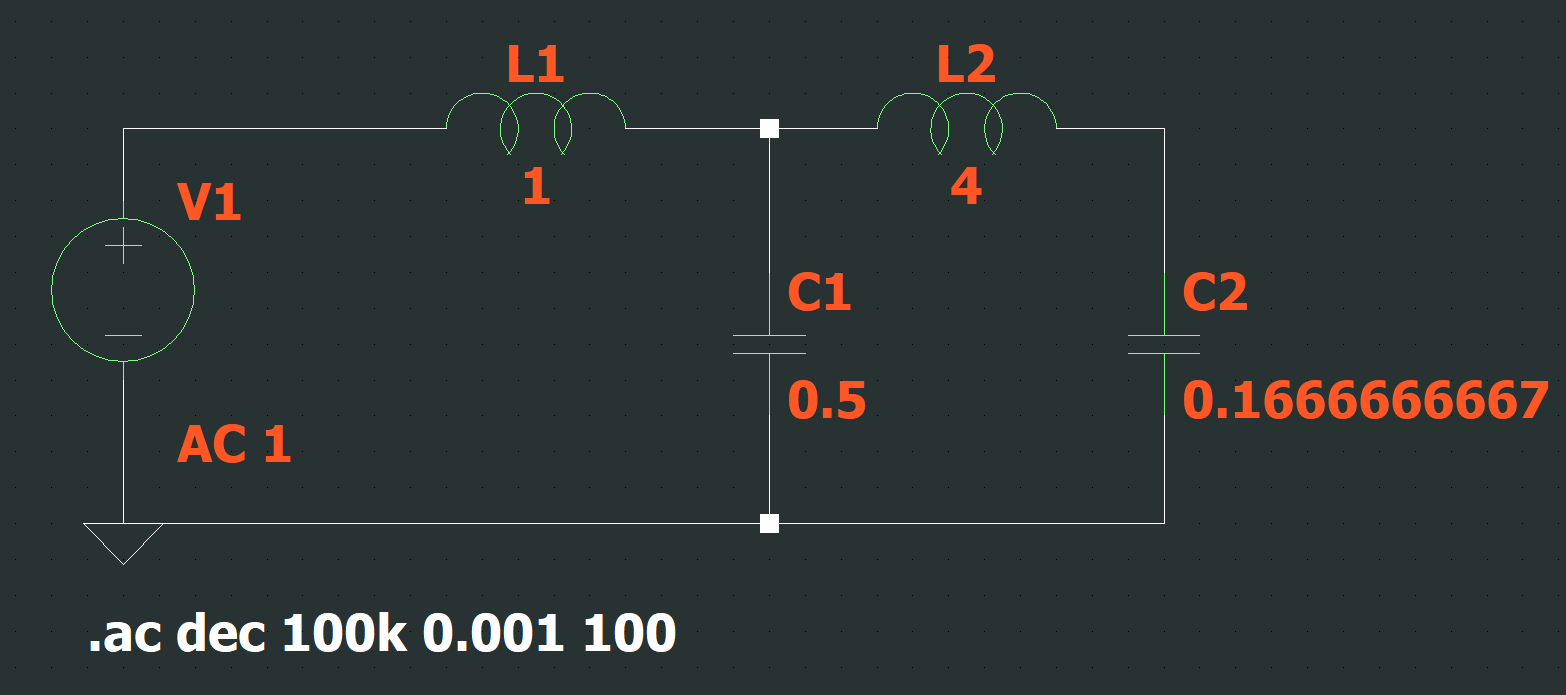

Cauer - Removiendo $\frac{K_0}{S}$
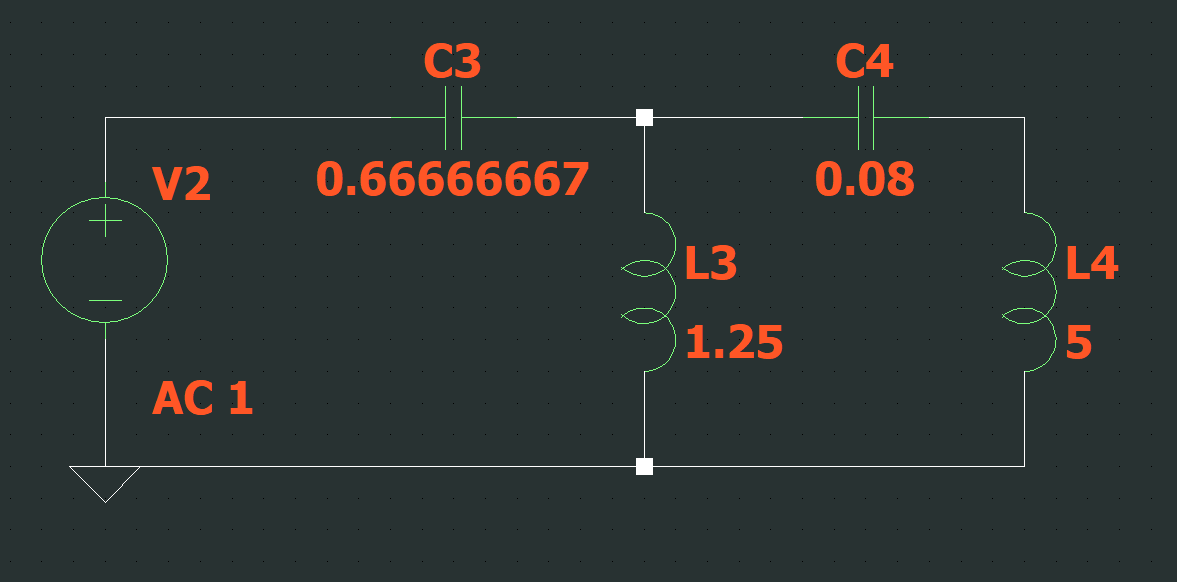

Comparado con expresión de impedancia que se plantea en el enunciado:

## $Z_{(S)}=\frac{(S^2+3) (S^2+1) } { S(S^2+2) }$

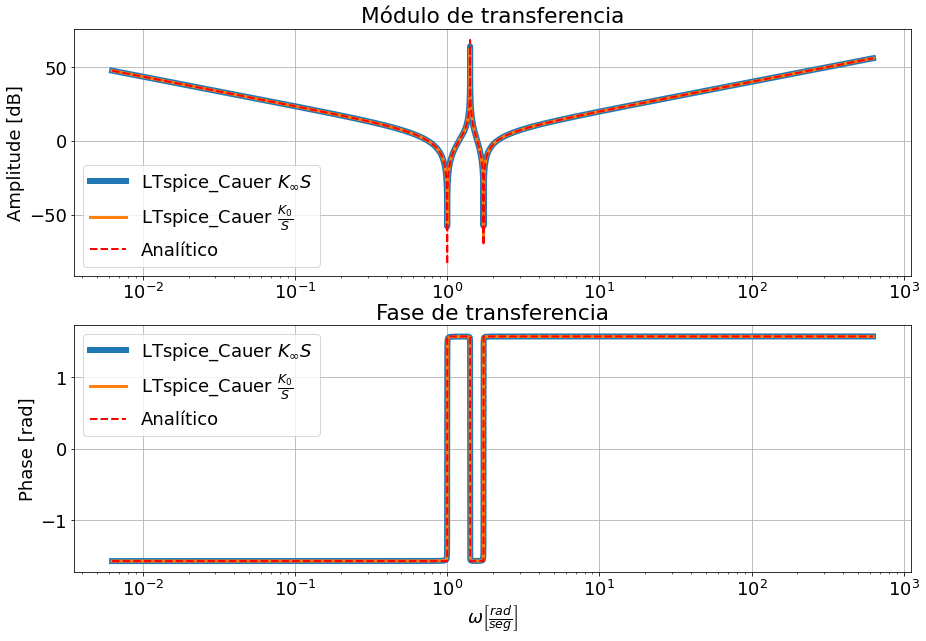

In [5]:
l = ltspice.Ltspice("./Simulaciones_LTspice/1-Cauer.raw")
l.parse()

fig, axes = plt.subplots(2, 1, figsize=(15,10))

#Obtengo curvas de simulación en ltspice

freq = l.get_frequency()
Z_cauer_inf = 1/l.get_data('I(V1)') #1V/I_V1 = Z (V1 = 1V)
Z_cauer_orig = 1/l.get_data('I(V2)') #1V/I_V2 = Z (V2 = 1V)

Z_cauer_inf_amplitude = 20 * np.log10(np.abs(Z_cauer_inf))
Z_cauer_inf_angle = np.unwrap(np.angle(Z_cauer_inf))-np.pi

Z_cauer_orig_amplitude = 20 * np.log10(np.abs(Z_cauer_orig))
Z_cauer_orig_angle = np.unwrap(np.angle(Z_cauer_orig))-np.pi

#Comparo con la función de excitación de la consigna
num = [1,0,4,0,3]
den = [1,0,2,0]
w, F = sig.freqs(num,den,freq*2*np.pi)
    
axes[0].semilogx(freq*2*np.pi, Z_cauer_inf_amplitude, linewidth=6.0, label=r'LTspice_Cauer $K_{\infty}S$')
axes[0].semilogx(freq*2*np.pi, Z_cauer_orig_amplitude, linewidth=3.0, label=r'LTspice_Cauer $\frac{K_0}{S}$')
axes[0].semilogx(w, 20*np.log10(np.abs(F)), 'r--', linewidth=2.0, label='Analítico')

axes[1].semilogx(freq*2*np.pi, Z_cauer_inf_angle, linewidth=6.0, label=r'LTspice_Cauer $K_{\infty}S$')
axes[1].semilogx(freq*2*np.pi, Z_cauer_orig_angle, linewidth=3.0, label=r'LTspice_Cauer $\frac{K_0}{S}$')
axes[1].semilogx(w, np.angle(F), 'r--', linewidth=2.0, label='Analítico')

axes[0].grid()
axes[1].grid()

axes[0].set_title("Módulo de transferencia")
axes[1].set_title("Fase de transferencia")

axes[1].set_xlabel(r'$\omega \left[\frac{rad}{seg}\right]$')

axes[0].set_ylabel("Amplitude [dB]")
axes[1].set_ylabel("Phase [rad]")

#plt.savefig("ac.png")

axes[0].legend()
axes[1].legend()

plt.show()

## Verificación Punto 2

Circuito simulado con valores calculados:
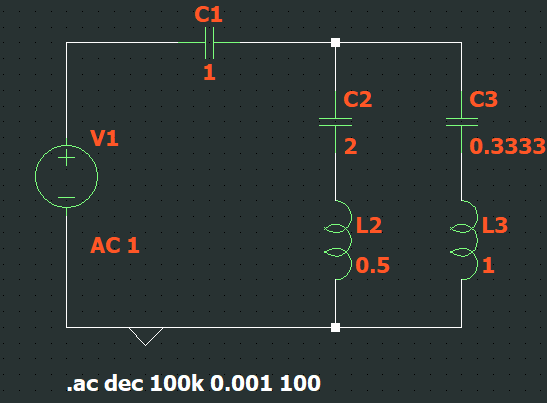

Observación: En el circuito ya se comprueba que $L_2$ y $C_2$ resuenan a $1\frac{rad}{seg}$:

$\omega_{res} = \frac{1}{\sqrt{L_2 C_2}} = \frac{1}{\sqrt{0.5Hy\cdot 2F}} = 1\frac{rad}{seg} $

Comparado con expresión de admitancia que se plantea en el enunciado:

## $Y_{(S)}=\frac{3S \left( S^2 + \frac{7}{3} \right) } { (S^2+2) (S^2+5) }$

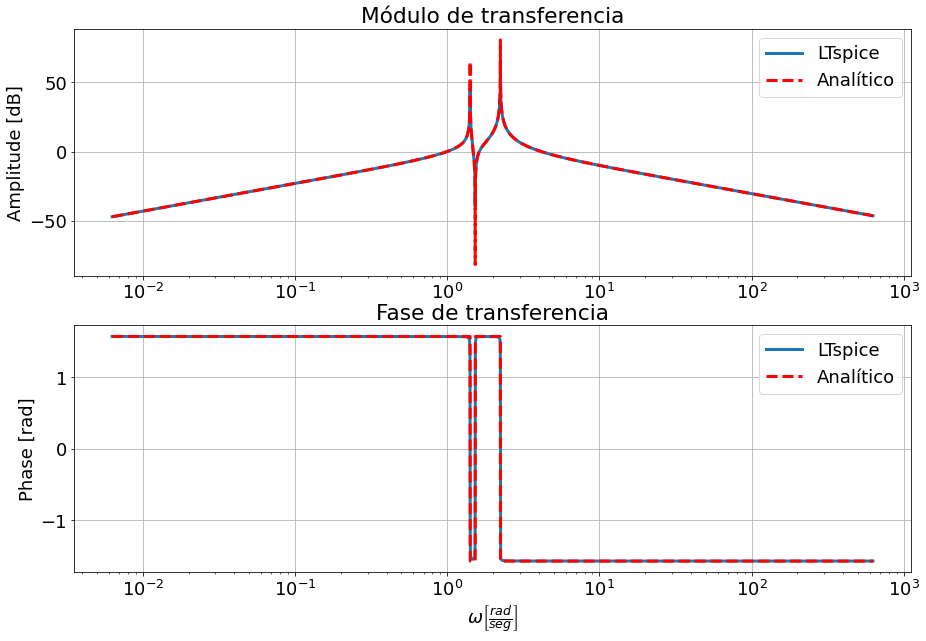

In [6]:
l = ltspice.Ltspice("./Simulaciones_LTspice/2.raw")
l.parse()

fig, axes = plt.subplots(2, 1, figsize=(15,10))

#Obtengo curvas de simulación en ltspice

freq = l.get_frequency()
Y = l.get_data('I(C1)') #I_C1/1V = Y (V1 = 1V)

Y_amplitude = 20 * np.log10(np.abs(Y))
Y_angle = np.unwrap(np.angle(Y))+np.pi

#Comparo con la función de excitación de la consigna
num = [3,0,7,0]
den = [1,0,7,0,10]
w, F = sig.freqs(num,den,freq*2*np.pi)
    
axes[0].semilogx(freq*2*np.pi, Y_amplitude, linewidth=3.0, label='LTspice')
axes[0].semilogx(w, 20*np.log10(np.abs(F)), 'r--', linewidth=3.0, label='Analítico')

axes[1].semilogx(freq*2*np.pi, Y_angle, linewidth=3.0, label='LTspice')
axes[1].semilogx(w, np.angle(F), 'r--', linewidth=3.0, label='Analítico')

axes[0].grid()
axes[1].grid()

axes[0].set_title("Módulo de transferencia")
axes[1].set_title("Fase de transferencia")

axes[1].set_xlabel(r'$\omega \left[\frac{rad}{seg}\right]$')

axes[0].set_ylabel("Amplitude [dB]")
axes[1].set_ylabel("Phase [rad]")

#plt.savefig("ac.png")

axes[0].legend()
axes[1].legend()

plt.show()